In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA  # Updated import for ARIMA from statsmodels
from datetime import datetime
from pandas.plotting import lag_plot

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from math import sqrt
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
#lstm is used
#arima is used
#sarima


In [ ]:
airpass = pd.read_csv('./datasets/AirPassengers (2).csv')

In [ ]:
airpass.head(5)



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
  airpass.tail(5)


,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
airpass.rename(columns={'#Passengers':'Passengers'},inplace=True)


In [ ]:
airpass.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
airpass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
from datetime import datetime
airpass['Month']=pd.to_datetime(airpass['Month'],infer_datetime_format=True)


In [ ]:
airpass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
airpassind = airpass.set_index('Month',inplace=False)


In [ ]:
airpassind.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


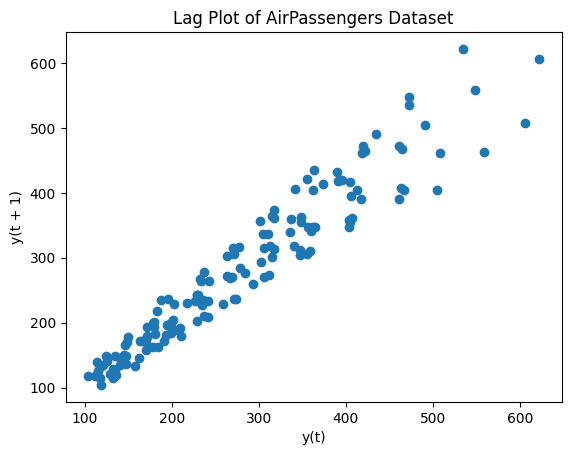

In [ ]:
from pandas.plotting import lag_plot

# Create a lag plot
lag_plot(airpass['Passengers'])
plt.title('Lag Plot of AirPassengers Dataset')
plt.show()


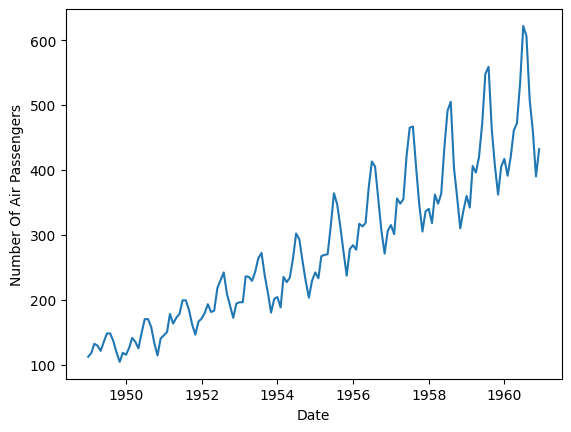

In [ ]:
  plt.xlabel('Date')
  plt.ylabel('Number Of Air Passengers')
  plt.plot(airpassind)

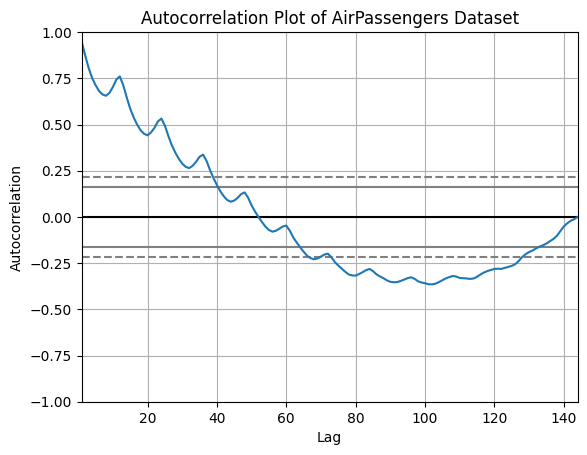

In [ ]:


# Define a parser function to handle date formatting
def parser(x):
    return datetime.strptime(x, '%Y-%m')
airpass['Month'] = pd.to_datetime(airpass['Month'])

# Set 'Month' as index
airpass.set_index('Month', inplace=True)

# Create an autocorrelation plot (lag plot)
autocorrelation_plot(airpass['Passengers'])
plt.title('Autocorrelation Plot of AirPassengers Dataset')
plt.show()
# the best lag is 40


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Tue, 28 May 2024   AIC                           1390.135
Time:                        16:48:58   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

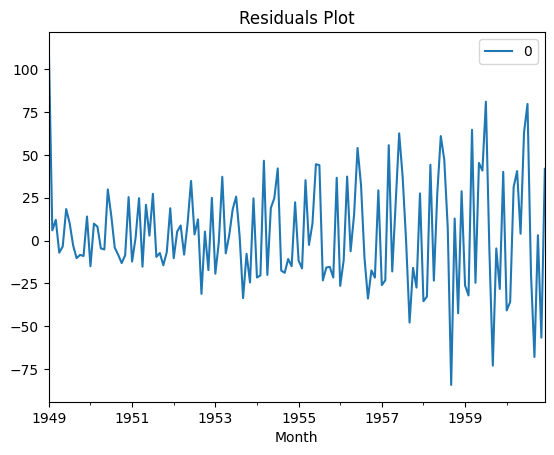

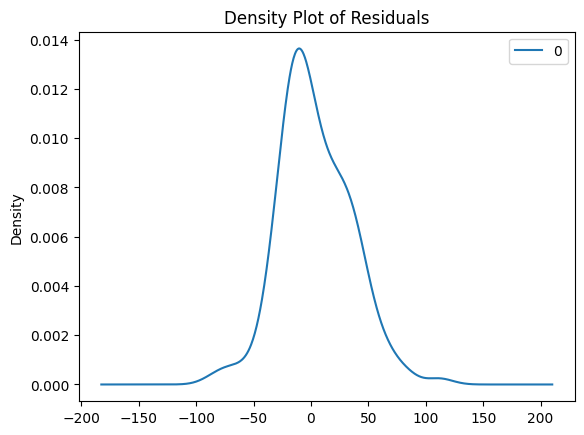

                0
count  144.000000
mean     3.893151
std     31.087159
min    -84.397612
25%    -16.548937
50%     -1.792613
75%     25.066151
max    112.000000


In [ ]:

model = ARIMA(airpass, order=(5,1,0))
model_fit = model.fit()

# Summary of fitted model
print(model_fit.summary())

# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals Plot')
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

# Summary statistics of residuals
print(residuals.describe())


predicted=275.705537, expected=306.000000
predicted=342.312578, expected=315.000000
predicted=321.150523, expected=301.000000
predicted=302.525052, expected=356.000000
predicted=362.609226, expected=348.000000
predicted=328.159841, expected=355.000000
predicted=365.805274, expected=422.000000
predicted=415.417717, expected=465.000000
predicted=468.303411, expected=467.000000
predicted=460.548387, expected=404.000000
predicted=364.846093, expected=347.000000
predicted=337.061707, expected=305.000000
predicted=304.642748, expected=336.000000
predicted=378.807394, expected=340.000000
predicted=347.039298, expected=318.000000
predicted=319.545208, expected=362.000000
predicted=370.183743, expected=348.000000
predicted=330.974681, expected=363.000000
predicted=380.116928, expected=435.000000
predicted=433.599677, expected=491.000000
predicted=500.902643, expected=505.000000
predicted=495.672712, expected=404.000000
predicted=343.735373, expected=359.000000
predicted=361.834794, expected=310

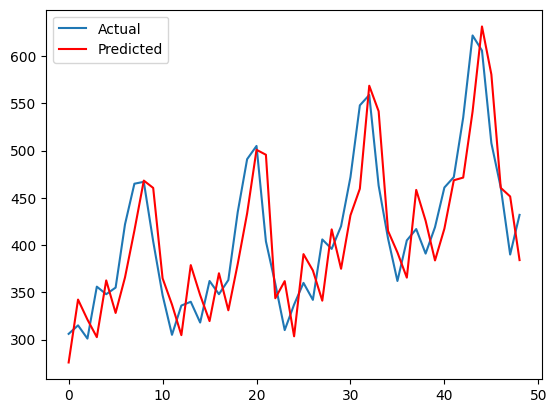

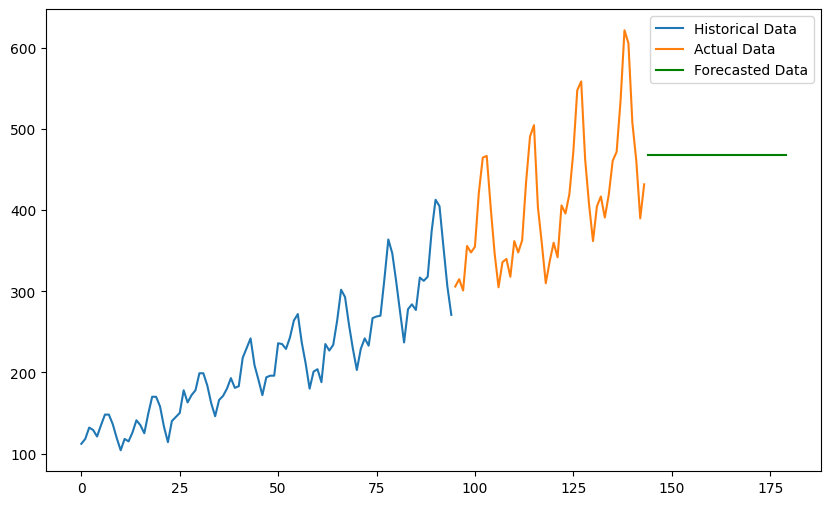

In [ ]:
#arima
# Fit ARIMA model
# Split the dataset into train and test sets
X = airpass['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mad = np.mean(np.abs(test - predictions))
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Generate forecasts for 3 years (36 months)
forecast = []  # Define an empty list to store forecasted values
for t in range(len(test) + 36):  # Extend loop range by 36 months
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    if t >= len(test):  # Check if it's a forecasted value
        forecast.append(yhat)
    else:
        predictions.append(yhat)
    if t < len(test):  # Update history for actual data
        obs = test[t]
        history.append(obs)

# Plot historical data and forecasted data
plt.figure(figsize=(10, 6))  # Create a new figure
plt.plot(range(len(train)), train, label='Historical Data')  # Plot historical data
plt.plot(range(len(train), len(train) + len(test)), test, label='Actual Data')  # Plot actual data
plt.plot(range(len(train), len(train) + len(test) + len(forecast)), [None]*len(test) + forecast, color='green', label='Forecasted Data')  # Plot forecasted data
plt.legend()
plt.show()


predicted=310.666667, expected=306.000000
predicted=294.333333, expected=315.000000
predicted=297.333333, expected=301.000000
predicted=307.333333, expected=356.000000
predicted=324.000000, expected=348.000000
predicted=335.000000, expected=355.000000
predicted=353.000000, expected=422.000000
predicted=375.000000, expected=465.000000
predicted=414.000000, expected=467.000000
predicted=451.333333, expected=404.000000
predicted=445.333333, expected=347.000000
predicted=406.000000, expected=305.000000
predicted=352.000000, expected=336.000000
predicted=329.333333, expected=340.000000
predicted=327.000000, expected=318.000000
predicted=331.333333, expected=362.000000
predicted=340.000000, expected=348.000000
predicted=342.666667, expected=363.000000
predicted=357.666667, expected=435.000000
predicted=382.000000, expected=491.000000
predicted=429.666667, expected=505.000000
predicted=477.000000, expected=404.000000
predicted=466.666667, expected=359.000000
predicted=422.666667, expected=310

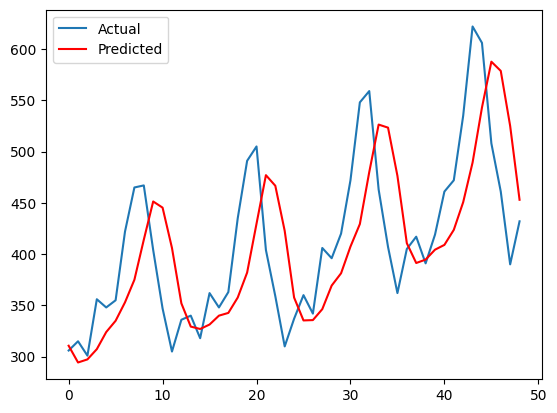

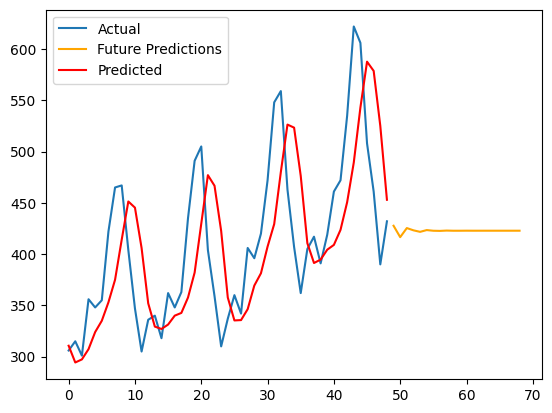

In [ ]:

# Split the dataset into train and test sets
X = airpass['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# Define window size for moving average
window_size = 3
history = [x for x in train]
predictions = []

# Walk-forward validation using moving average
for t in range(len(test)):
    if len(history) < window_size:
        yhat = np.mean(history)
    else:
        yhat = np.mean(history[-window_size:])
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mad = np.mean(np.abs(test - predictions))
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Calculate accuracy
accuracy = 100 - mape


print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')


# Assuming you have already imported necessary libraries like matplotlib.pyplot
# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

# Number of future time steps to forecast beyond the test data
future_steps = 20  # Adjust this as needed

# Generate future sequences for prediction
future_sequence = test[-window_size:].tolist()  # Start with the last window from the test data
future_predictions = []

for i in range(future_steps):
    if len(future_sequence) < window_size:
        # If there are not enough observations for a full window, take the mean of available observations
        future_value = np.mean(future_sequence)
    else:
        # Take the mean of the last window_size observations
        future_value = np.mean(future_sequence[-window_size:])
    future_predictions.append(future_value)
    # Update the sequence by appending the predicted value
    future_sequence.append(future_value)

# Plot forecasts against actual outcomes including future predictions
plt.plot(range(len(test)), test, label='Actual')
plt.plot(range(len(test), len(test) + len(future_predictions)), future_predictions, color='orange', label='Future Predictions')
plt.plot(range(len(test)), predictions, color='red', label='Predicted')
plt.legend()
plt.show()



Test RMSE: 30.241
Test MAE: 21.444
Test MSLE: 0.004
Test MAPE: 4.797
Test Accuracy: 95.203%


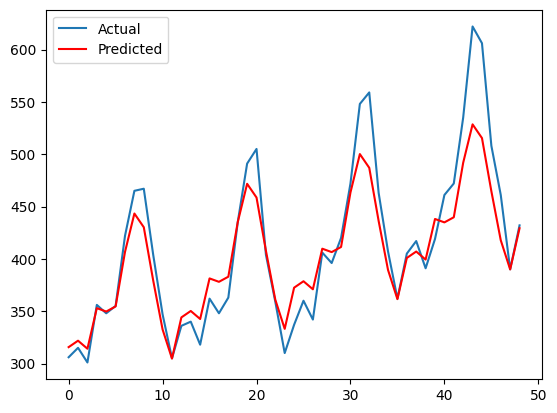

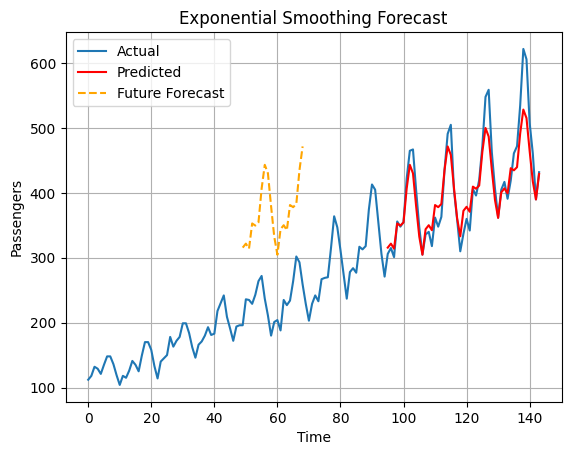

In [ ]:
import numpy as np
from pandas import read_csv
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from matplotlib import pyplot as plt

# Split the dataset into train and test sets
X = airpass['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# Fit the model
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mad = np.mean(np.abs(test - predictions))
msle = mean_squared_log_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100


# Calculate accuracy
accuracy = 100 - mape

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')



# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Number of future time steps to forecast beyond the test data
future_steps = 20  # Adjust this as needed

# Forecast future values
future_forecast = model_fit.forecast(steps=future_steps)

# Generate indices for future time steps
future_indices = np.arange(len(test), len(test) + future_steps)

# Plot forecasts against actual outcomes including future predictions
plt.plot(np.arange(len(X)), X, label='Actual')
plt.plot(np.arange(len(train), len(train) + len(predictions)), predictions, color='red', label='Predicted')
plt.plot(future_indices, future_forecast, color='orange', linestyle='--', label='Future Forecast')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()


Test MAE: 19.529
Test RMSE: 24.909
Test Accuracy: 95.252%


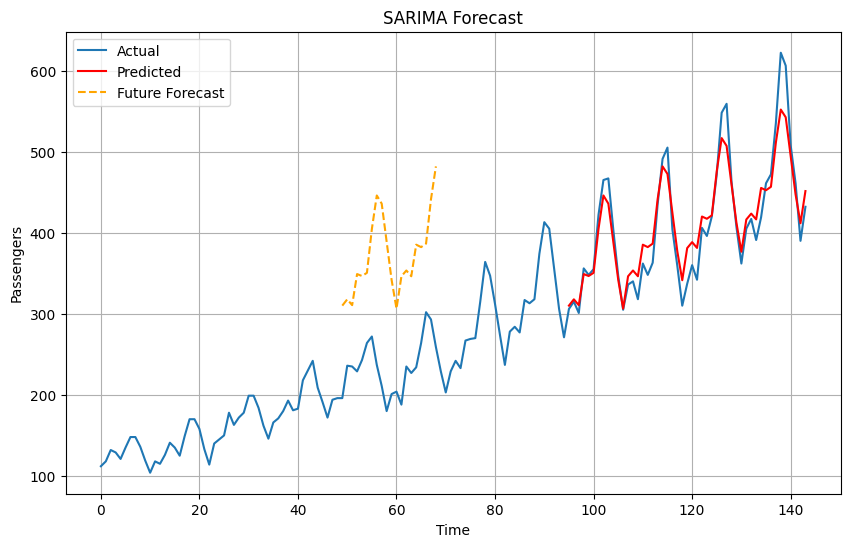

In [ ]:
import numpy as np
from pandas import read_csv
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Split the dataset into train and test sets
X = airpass['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# Fit the SARIMA model
order = (0, 1, 1)  # Example ARIMA order
seasonal_order = (1, 1, 1, 12)  # Example seasonal order

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate forecasts
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mean_squared_error(test, predictions))
accuracy = 100 - mae / np.mean(test) * 100  # Calculate accuracy

print(f'Test MAE: {mae:.3f}')
print(f'Test RMSE: {rmse:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Forecast future values
future_steps = 20
future_forecast = model_fit.forecast(steps=future_steps)

# Generate indices for future time steps
future_indices = np.arange(len(test), len(test) + future_steps)

# Plot forecasts against actual outcomes including future predictions
plt.figure(figsize=(10, 6))
plt.plot(X, label='Actual')
plt.plot(np.arange(len(train), len(train) + len(predictions)), predictions, color='red', label='Predicted')
plt.plot(future_indices, future_forecast, color='orange', linestyle='--', label='Future Forecast')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


Test RMSE: 70.612
Test MAE: 61.734
Test MSLE: 0.028
Test MAPE: 15.454
Test Accuracy: 84.546%


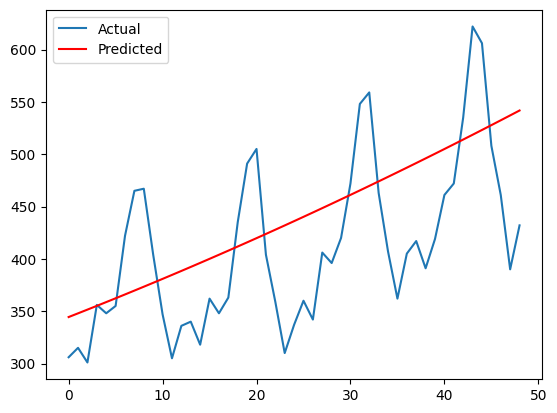

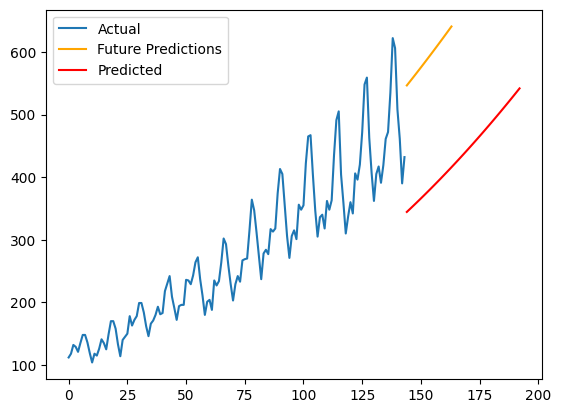

In [ ]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from matplotlib import pyplot as plt


# Prepare the data
X = np.arange(len(airpass)).reshape(-1, 1)
y = airpass['Passengers'].values

# Split the dataset into train and test sets
size = int(len(X) * 0.66)
train_X, test_X = X[:size], X[size:]
train_y, test_y = y[:size], y[size:]

# Polynomial features transformation
degree = 2  # Set the degree of polynomial features
poly = PolynomialFeatures(degree=degree)
train_X_poly = poly.fit_transform(train_X)
test_X_poly = poly.transform(test_X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(train_X_poly, train_y)

# Make predictions
train_predictions = model.predict(train_X_poly)
test_predictions = model.predict(test_X_poly)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test_y, test_predictions))
mae = mean_absolute_error(test_y, test_predictions)
mad = np.mean(np.abs(test_y - test_predictions))
msle = mean_squared_log_error(test_y, test_predictions)
mape = np.mean(np.abs((test_y - test_predictions) / test_y)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')


# Plot forecasts against actual outcomes
plt.plot(test_y, label='Actual')
plt.plot(test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Number of future time steps to forecast beyond the test data
future_steps = 20  # Adjust this as needed

# Generate future indices for prediction
future_indices = np.arange(len(X), len(X) + future_steps).reshape(-1, 1)

# Transform future indices into polynomial features
future_indices_poly = poly.transform(future_indices)

# Make predictions for future time steps
future_predictions = model.predict(future_indices_poly)

# Plot forecasts against actual outcomes including future predictions
plt.plot(np.arange(len(X)), y, label='Actual')
plt.plot(np.arange(len(X), len(X) + len(future_predictions)), future_predictions, color='orange', label='Future Predictions')
plt.plot(np.arange(len(X), len(X) + len(test_predictions)), test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()


Epoch 1/100
3/3 [==============================] - 8s 13ms/step - loss: 0.0562
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0283
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0115
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0079
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 11/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 12/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0062
Epoch 13/100
3/3 [==============================]

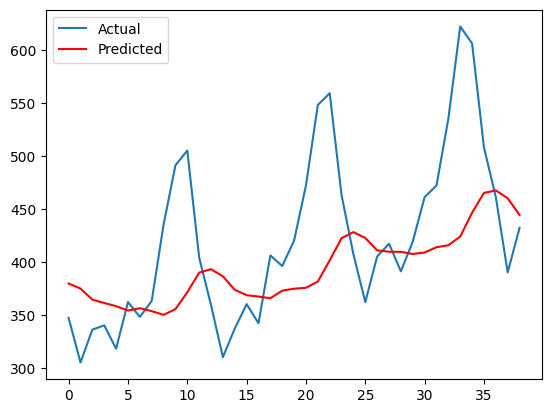

1/1 [==============================] - 0s 20ms/step


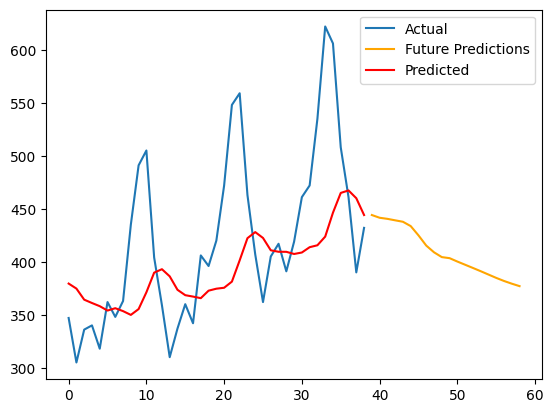

In [ ]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from matplotlib import pyplot as plt

# Prepare the data
data = airpass['Passengers'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the dataset into train and test sets
size = int(len(scaled_data) * 0.66)
train_data, test_data = scaled_data[0:size], scaled_data[size:]

# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences for training
train_X, train_y = create_sequences(train_data, sequence_length)

# Create sequences for testing
test_X, test_y = create_sequences(test_data, sequence_length)

# Reshape input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1)

# Make predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform(train_y)
test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform(test_y)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test_y, test_predictions))
mae = mean_absolute_error(test_y, test_predictions)
mad = np.mean(np.abs(test_y - test_predictions))
msle = mean_squared_log_error(test_y, test_predictions)
mape = np.mean(np.abs((test_y - test_predictions) / test_y)) * 100

# Calculate accuracy
accuracy = 100 - mape


print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test_y, label='Actual')
plt.plot(test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Number of future time steps to forecast beyond the test data
future_steps = 20  # Adjust this as needed

# Generate future sequences for prediction
future_sequence = test_X[-1]  # Start with the last sequence from the test data
future_predictions = []

for i in range(future_steps):
    # Predict the next value
    future_value = model.predict(future_sequence.reshape(1, sequence_length, 1))

    # Append the predicted value to the list of predictions
    future_predictions.append(future_value)

    # Update the sequence by removing the first element and appending the predicted value
    future_sequence = np.append(future_sequence[1:], future_value)

# Inverse scaling for future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Extend the test data indices for the future predictions
future_indices = range(len(test_y), len(test_y) + future_steps)

# Plot forecasts against actual outcomes including future predictions
plt.plot(range(len(test_y)), test_y, label='Actual')
plt.plot(range(len(test_y), len(test_y) + len(future_predictions)), future_predictions, color='orange', label='Future Predictions')
plt.plot(range(len(test_y)), test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()



Test RMSE: 106.453
Test MAE: 82.333
Test MSLE: 0.062
Test MAPE: 17.531
Test Accuracy: 82.469%


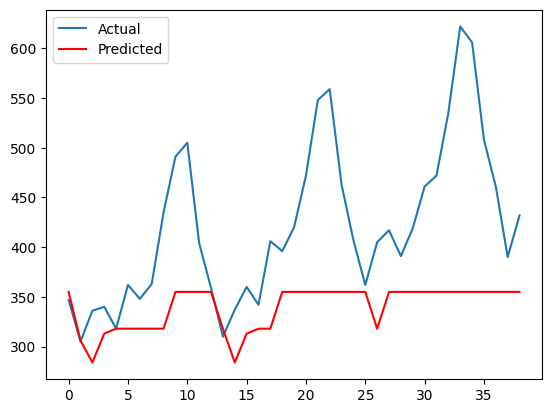

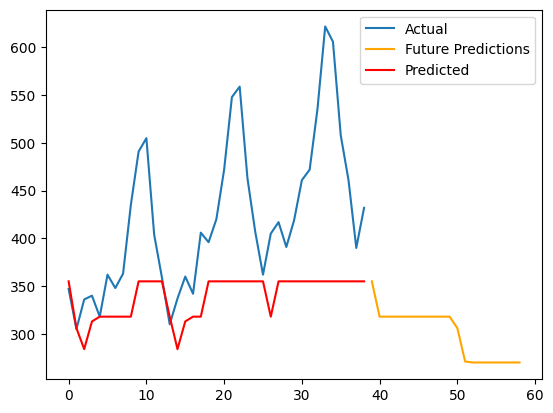

In [ ]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from math import sqrt
from matplotlib import pyplot as plt

# Prepare the data
data = airpass['Passengers'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the dataset into train and test sets
size = int(len(scaled_data) * 0.66)
train_data, test_data = scaled_data[0:size], scaled_data[size:]

# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create sequences for training
train_X, train_y = create_sequences(train_data, sequence_length)

# Create sequences for testing
test_X, test_y = create_sequences(test_data, sequence_length)

# Reshape input data for decision tree
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]))

# Build the decision tree model
model = DecisionTreeRegressor()

# Train the model
model.fit(train_X, train_y)

# Make predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
train_y = scaler.inverse_transform(train_y.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
test_y = scaler.inverse_transform(test_y.reshape(-1, 1))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test_y, test_predictions))
mae = mean_absolute_error(test_y, test_predictions)
mad = np.mean(np.abs(test_y - test_predictions))
msle = mean_squared_log_error(test_y, test_predictions)
mape = np.mean(np.abs((test_y - test_predictions) / test_y)) * 100

# Calculate accuracy
accuracy = 100 - mape

print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MSLE: {msle:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test Accuracy: {accuracy:.3f}%')

# Plot forecasts against actual outcomes
plt.plot(test_y, label='Actual')
plt.plot(test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()
# Number of future time steps to forecast beyond the test data
future_steps = 20  # Adjust this as needed

# Generate future sequences for prediction
future_sequence = test_X[-1]  # Start with the last sequence from the test data
future_predictions = []

for i in range(future_steps):
    # Predict the next value
    future_value = model.predict(future_sequence.reshape(1, -1))

    # Append the predicted value to the list of predictions
    future_predictions.append(future_value)

    # Update the sequence by removing the first element and appending the predicted value
    future_sequence = np.append(future_sequence[1:], future_value)

# Inverse scaling for future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Extend the test data indices for the future predictions
future_indices = range(len(test_y), len(test_y) + future_steps)

# Plot forecasts against actual outcomes including future predictions
plt.plot(range(len(test_y)), test_y, label='Actual')
plt.plot(range(len(test_y), len(test_y) + len(future_predictions)), future_predictions, color='orange', label='Future Predictions')
plt.plot(range(len(test_y)), test_predictions, color='red', label='Predicted')
plt.legend()
plt.show()

